<a href="https://colab.research.google.com/github/tonyCMLan/DementiaDataExploration/blob/main/DementiaDataExploration2025_Differential_Protein_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import ttest_ind



In [2]:
#Load Datasets
#Original Datasets available at https://aging.brain-map.org/download/index

Donor_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSources/DonorInformation.csv")
protein_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSources/ProteinAndPathologyQuantifications.csv")


In [3]:
protein_df.head(
)

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,il_4_pg_per_mg,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,2.68,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,3.02,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,0.80,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,1.30,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,0.00,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263


In [4]:
Donor_df.head(
)

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2


In [5]:
# Create df of donors ids and corresponding diagnosis, this will be used to map to the proteins data samples
donor_labels_df = Donor_df[['donor_id','act_demented']]

In [6]:
donor_labels_df.head()

,donor_id,act_demented
0,326765665,No Dementia
1,326765656,No Dementia
2,326765654,Dementia
3,467056391,No Dementia
4,309335447,Dementia


In [7]:
# Map donor_labels_df to protein_df so each sample will be associated with the appropriate diagnosis
donor_labels_dict = donor_labels_df.set_index('donor_id')['act_demented'].to_dict()
protein_df['dementia_status'] = protein_df['donor_id'].map(donor_labels_dict)

In [8]:
#Examine protein_df to ensure labels properly populated
protein_df.head()

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia


In [9]:
#Check the distribution of Dementia in Protein samples dataset
print('No Dementia: ', len(protein_df[protein_df['dementia_status']=='No Dementia']))
print('Dementia: ', len(protein_df[protein_df['dementia_status']=='Dementia']))

No Dementia:  197
Dementia:  180


# Handling Missing Data

In [10]:
#Check for Nan
total_nan_count = protein_df.isna().sum()
total_nan_count

,0
donor_id,0
donor_name,0
structure_id,0
structure_acronym,0
ihc_a_syn,0
ihc_tau2_ffpe,21
ihc_at8_ffpe,16
ihc_at8,0
ihc_ptdp_43_ffpe,15
ihc_a_beta_ffpe,22


In [11]:
# Process dataframe by Dropping Nan
# - drop isoprostane_pg_per_mg because missing most of the data (63% of samples missing isoprostane data)
# - dropna for remaining columns (will still represent >70% of the samples)

protein_df_drop_cleaned = protein_df.drop('isoprostane_pg_per_mg',axis=1)
protein_df_drop_cleaned.dropna(inplace = True)

In [12]:
# Check for Nan after cleaning
total_nan_count = protein_df_drop_cleaned.isna().sum()
total_nan_count

,0
donor_id,0
donor_name,0
structure_id,0
structure_acronym,0
ihc_a_syn,0
ihc_tau2_ffpe,0
ihc_at8_ffpe,0
ihc_at8,0
ihc_ptdp_43_ffpe,0
ihc_a_beta_ffpe,0


In [13]:
# protein_df_drop_cleaned has samples with corresponding dementia labels and no missing values.
# Represents total of 279 samples from original 377 samples (74%)
protein_df_drop_cleaned.head()

,donor_id,donor_name,structure_id,structure_acronym,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,H14.09.030,10557,FWM,0.000078,0.002358,0.001137,0.000110,0.001259,0.008335,...,15.99,0.736100,0.122288,1.47,20.78,5.03736,9.38,11.78,523.292251,No Dementia
1,309335480,H14.09.043,10208,PCx,0.000063,0.002762,0.001272,0.000164,0.002354,0.005047,...,24.04,0.669094,0.111962,1.44,40.40,4.95462,8.10,45.02,81.493875,Dementia
2,309335493,H14.09.056,10557,FWM,0.000064,0.003468,0.013787,0.016023,0.001708,0.007365,...,129.80,0.736100,0.091084,0.54,46.88,5.88409,27.00,15.82,470.734514,Dementia
3,326765668,H14.09.081,10557,FWM,0.000049,0.003035,0.001707,0.000137,0.001729,0.004046,...,15.16,8.995575,0.054076,0.76,10.34,16.13524,8.06,24.22,568.368571,No Dementia
4,326765668,H14.09.081,10235,TCx,0.000080,0.002088,0.004489,0.000062,0.001513,0.015809,...,17.90,95.931000,0.030000,1.22,21.38,0.03000,10.52,23.72,438.863263,No Dementia


In [14]:
# Protein groups
# There are 28 different protein measures, however there are only 14 distinct proteins.
# Some measures are different methods of measuring the same protein, for example ihc_a_syn is measuring the
# stain area coverage for α-synuclein, while a_syn_pg_per_mg is measuring the concentration of a_syn_pg_per_mg

# Amyloid: ihc_a_beta, ab42_over_ab40_ratio, ihc_a_beta_ffpe, ab42_pg_per_mg, ab40_pg_per_mg
# α-synuclein:ihc_a_syn, a_syn_pg_per_mg
# interferon: ifn_g_pg_per_mg
# RANTES: rantes_pg_per_mg
# Tau: ihc_tau2_ffpe, ptau_over_tau_ratio, ptau_ng_per_mg, ihc_at8, ihc_at8_ffpe, tau_ng_per_mg
# Isoprostane: isoprostane_pg_per_mg
# BDNF: bdnf_pg_per_mg
# MIP-1a: mip_1a_pg_per_mg
# Interleukins: il_4_pg_per_mg, il_1b_pg_per_mg, il_7_pg_per_mg, il_6_pg_per_mg, il_10_pg_per_mg
# MCP-1: mcp_1_pg_per_mg
# IBA-1: ihc_iba1_ffpe
# phospho-TDP43: ihc_ptdp_43_ffpe
# GFAP:ihc_gfap_ffpe
# TNF: Tumor Necrosis Factor alpha

In [15]:
#View list of columns
columns = protein_df_drop_cleaned.columns
columns

Index(['donor_id', 'donor_name', 'structure_id', 'structure_acronym',
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg', 'dementia_status'],
      dtype='object')

In [16]:
# columns to keep for training
# dropping catergorical columns as well as donor_id/donor_name and dementia status

columns_keep_for_training = [
       'ihc_a_syn', 'ihc_tau2_ffpe', 'ihc_at8_ffpe', 'ihc_at8',
       'ihc_ptdp_43_ffpe', 'ihc_a_beta_ffpe', 'ihc_a_beta', 'ihc_iba1_ffpe',
       'ihc_gfap_ffpe', 'ptau_ng_per_mg', 'vegf_pg_per_mg',
       'ab42_over_ab40_ratio', 'tnf_a_pg_per_mg', 'tau_ng_per_mg',
       'il_10_pg_per_mg', 'il_6_pg_per_mg', 'il_1b_pg_per_mg',
       'ptau_over_tau_ratio', 'il_4_pg_per_mg', 'rantes_pg_per_mg',
       'ab40_pg_per_mg', 'a_syn_pg_per_mg', 'ifn_g_pg_per_mg',
       'mcp_1_pg_per_mg', 'bdnf_pg_per_mg', 'mip_1a_pg_per_mg',
       'il_7_pg_per_mg', 'ab42_pg_per_mg']



In [17]:
protein_df = protein_df_drop_cleaned.drop(columns=['donor_name','structure_id','structure_acronym'])
protein_df[columns_keep_for_training] = StandardScaler().fit_transform(protein_df[columns_keep_for_training])

In [18]:
protein_df.head()

,donor_id,ihc_a_syn,ihc_tau2_ffpe,ihc_at8_ffpe,ihc_at8,ihc_ptdp_43_ffpe,ihc_a_beta_ffpe,ihc_a_beta,ihc_iba1_ffpe,ihc_gfap_ffpe,...,rantes_pg_per_mg,ab40_pg_per_mg,a_syn_pg_per_mg,ifn_g_pg_per_mg,mcp_1_pg_per_mg,bdnf_pg_per_mg,mip_1a_pg_per_mg,il_7_pg_per_mg,ab42_pg_per_mg,dementia_status
0,309335467,-0.186213,-0.476935,-0.808699,-0.592045,-0.747346,-0.347761,-0.651448,-1.251921,0.184428,...,-0.587077,-0.219793,-0.148212,0.936077,-0.144148,0.024099,-0.218045,-0.261204,1.150422,No Dementia
1,309335480,-0.196749,-0.383359,-0.798369,-0.590046,0.605307,-0.693669,-0.484022,-0.303237,0.688750,...,-0.418503,-0.220248,-0.195378,0.901874,0.391535,0.013691,-0.235047,2.454703,-0.845440,Dementia
2,309335493,-0.195821,-0.219871,0.161193,-0.004266,-0.192207,-0.449796,-0.049970,-0.077416,-0.482890,...,1.796197,-0.219793,-0.290743,-0.124227,0.568458,0.130609,0.015993,0.068888,0.912988,Dementia
3,326765668,-0.206281,-0.320153,-0.764989,-0.591050,-0.166446,-0.798971,-0.686139,-0.423386,0.027758,...,-0.604457,-0.163670,-0.459785,0.126597,-0.429190,1.420097,-0.235578,0.755219,1.354059,No Dementia
4,326765668,-0.185078,-0.539547,-0.551682,-0.593828,-0.433202,0.438330,1.333880,-0.577105,-0.954874,...,-0.547080,0.427058,-0.569758,0.651049,-0.127766,-0.605775,-0.202903,0.714366,0.769007,No Dementia


In [19]:
# Explore differentially expressed proteins

dementia_df = protein_df[protein_df['dementia_status'] == 'Dementia']
no_dementia_df = protein_df[protein_df['dementia_status'] == 'No Dementia']

def calculate_differential_expression(protein):
    dementia_values = dementia_df[protein].values
    no_dementia_values = no_dementia_df[protein].values

    t_stat, p_value = ttest_ind(dementia_values, no_dementia_values)

    return p_value

p_values_df = pd.DataFrame(index=['P-Value'])

for protein in protein_df.columns[1:-1]:
    p_value = calculate_differential_expression(protein)
    p_values_df[protein] = p_value

p_values_df = p_values_df.T.rename(columns={'P-Value': 'P-Value'})

significance_threshold = 0.05
differentially_expressed_proteins = p_values_df[p_values_df['P-Value'] < significance_threshold]

print("Differentially Expressed Proteins:")
print(differentially_expressed_proteins)


Differentially Expressed Proteins:
                           P-Value
ihc_tau2_ffpe         8.811193e-07
ihc_at8_ffpe          2.828903e-07
ihc_at8               9.458078e-08
ihc_a_beta_ffpe       3.989251e-02
ihc_a_beta            1.884544e-03
ihc_gfap_ffpe         3.374644e-03
ptau_ng_per_mg        2.494403e-03
ab42_over_ab40_ratio  4.759910e-02
tau_ng_per_mg         3.087650e-02
ptau_over_tau_ratio   3.887665e-04
ab42_pg_per_mg        2.534198e-02


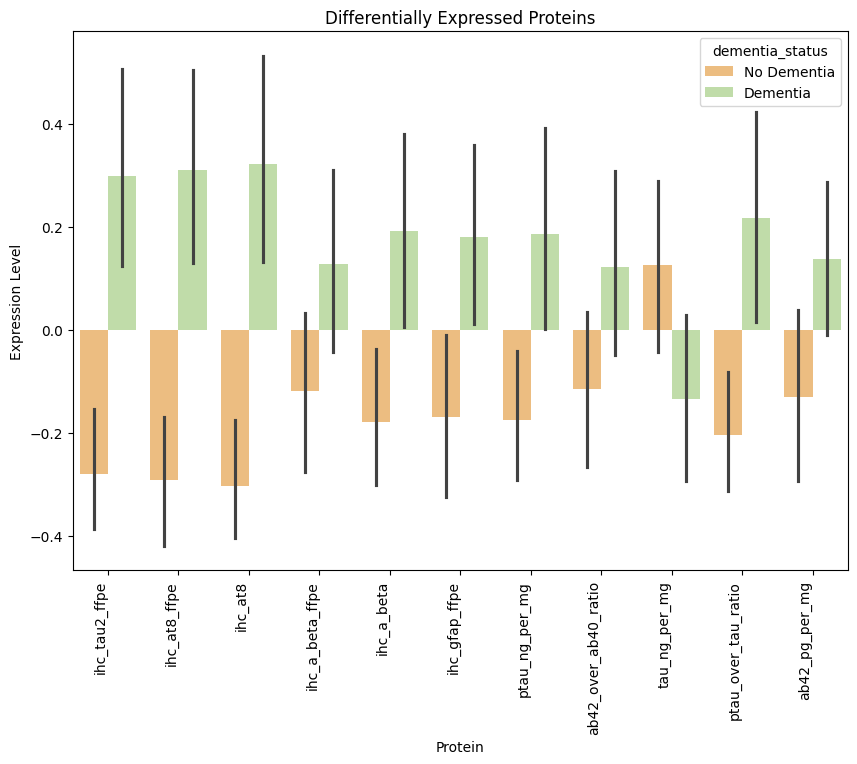

In [22]:
#Plot the differentially expressed proteins

significant_proteins = differentially_expressed_proteins.index.tolist()
#print(significant_proteins)

significant_proteins_df = protein_df[['dementia_status'] + significant_proteins]
#print(significant_proteins_df)

melted_df = pd.melt(significant_proteins_df, id_vars='dementia_status', var_name='Protein', value_name='Expression')

plt.figure(figsize=(10, 7))
sns.barplot(x='Protein', y='Expression', hue='dementia_status', data=melted_df, palette='Spectral')
plt.title('Differentially Expressed Proteins')
plt.xlabel('Protein')
plt.ylabel('Expression Level')
plt.xticks(rotation=90, ha='right')
plt.legend(title='dementia_status')
plt.show()